## Final-Project

### File for working (boston_housing.csv) - Link below

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv

## Import Libraries

All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

In [8]:
# Libraries--
# !pip install pandas==1.3.3
# !pip install numpy==1.21.2
# !pip install scipy==1.7.1
# !pip install seaborn==0.9.0
# !pip install matplotlib==3.4.3

Import the libraries we need for the lab

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

Read in the csv file from the url using the request library

In [4]:
## boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
## boston_df = pd.read_csv(boston_url)

boston_data = 'boston_housing.csv'
boston_df = pd.read_csv(boston_data)

## Dataset: boston_df

In [6]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Varplot for the Charles river variable.

In [21]:
Charles_River_eval = boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()
Charles_River_eval['CHAS'] = Charles_River_eval['CHAS'].replace([0, 1],['No bounded', 'Bounded'])
print(Charles_River_eval)

         CHAS       MEDV
0  No bounded  22.093843
1     Bounded  28.440000


[Text(0.5, 0, 'Bounded Charles river'),
 Text(0, 0.5, 'Median values of houses')]

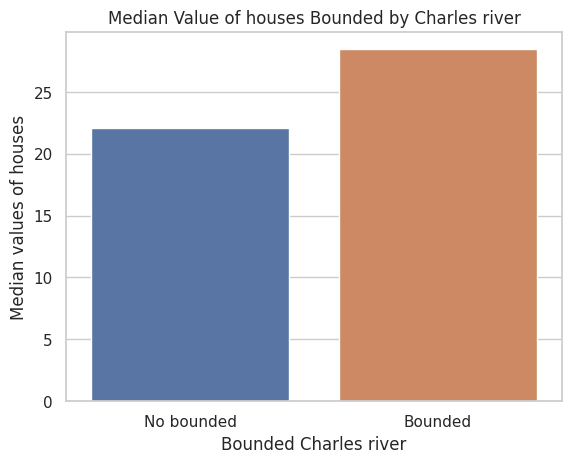

In [23]:
sns.set(style='whitegrid')
chrd = sns.barplot(x = 'CHAS', y = 'MEDV', data = Charles_River_eval)
chrd.set_title("Median Value of houses Bounded by Charles river")
chrd.set (xlabel = 'Bounded Charles river', ylabel = 'Median values of houses')

### Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Boxplot: Median values of owner-occupied homes.

[Text(0.5, 0, "Values in $1000's"), Text(0, 0.5, 'Median values of homes')]

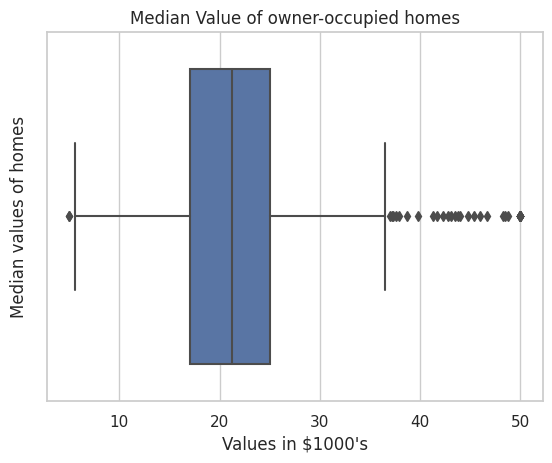

In [42]:
ax = sns.boxplot(x = 'MEDV', data=boston_df)
ax.set_title("Median Value of owner-occupied homes")
ax.set (xlabel = 'Values in $1000\'s', ylabel = 'Median values of homes')

### Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- Scatter plot: show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

State the hypothesis:
* $H_0:$ Is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
* $H_1:$ Is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

[Text(0.5, 0, 'Nox concentrations'),
 Text(0, 0.5, 'Non-retail business'),
 Text(0.5, 1.0, 'Relationship between Nox Concentration and non-retail business acres per town')]

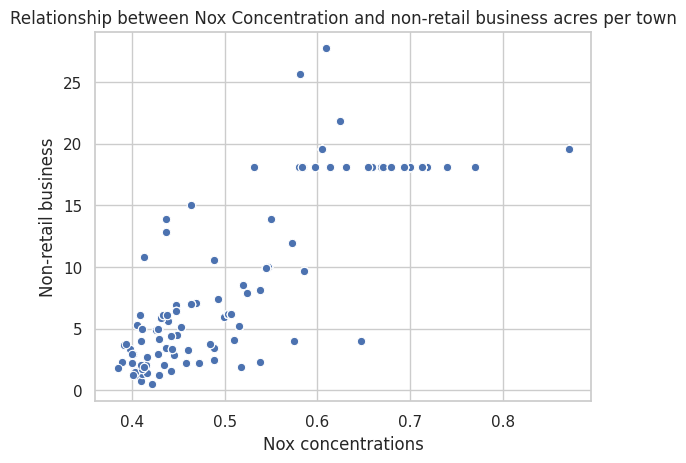

In [99]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
ax.set (xlabel = 'Nox concentrations', ylabel = 'Non-retail business', 
        title = 'Relationship between Nox Concentration and non-retail business acres per town')

In [98]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there exists a relationship between NOX concentrations and Non-retail business acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes")
* $H_1: µ_1 ≠ µ_2$ ("there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes")

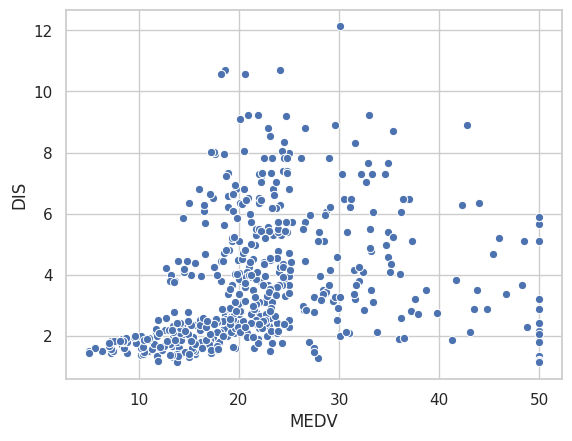

In [112]:
ax = sns.scatterplot(x="MEDV", y="DIS", data = boston_df)

In [116]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

PearsonRResult(statistic=0.24992873408590394, pvalue=1.2066117273371067e-08)

**Conclusion:** Since the p-value (Sig. (2-tailed) > 0.05, we ACCEPT the Null hypothesis and conclude that is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes

### Provide a boxplot for the MEDV variable vs the AGE variable.
Discretize the age variable into three groups:
- 35 years and younger
- between 35 and 70 years 
- 70 years and older

In [129]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


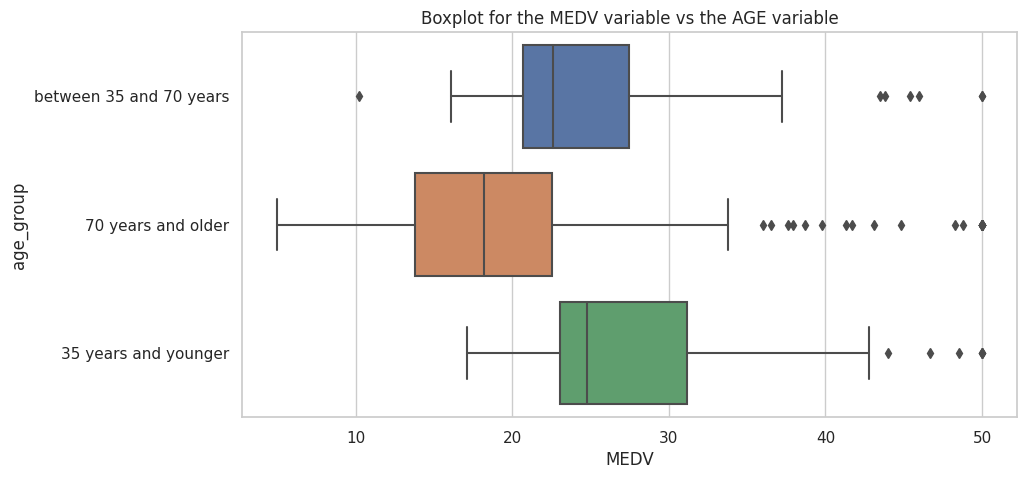

In [130]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

#### Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

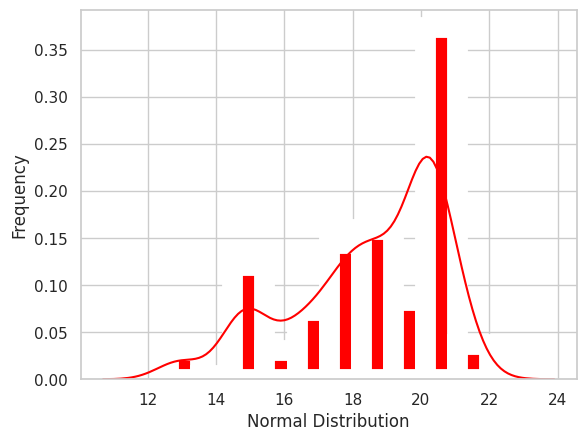

In [132]:
ax = sns.distplot(boston_df['PTRATIO'],
                  bins=10,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal